# **Lab 7 **

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# download data set: https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view
# info: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

# load data
bankdata=pd.read_csv('gdrive/My Drive/Lab7-data/bill_authentication.csv')

# see the data
bankdata.shape  

# see head
bankdata.head()  

# data processing
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']  

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

# train the SVM
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)  

# predictions
y_pred = svclassifier.predict(X_test)  

# Evaluate model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  



[[151   4]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       155
           1       0.97      0.99      0.98       120

   micro avg       0.98      0.98      0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [0]:
# Iris dataset  https://archive.ics.uci.edu/ml/datasets/iris4
def import_iris():
	url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

	# Assign colum names to the dataset
	colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

	# Read dataset to pandas dataframe
	irisdata = pd.read_csv(url, names=colnames) 

	# process
	X = irisdata.drop('Class', axis=1)  
	y = irisdata['Class']  

	# train
	from sklearn.model_selection import train_test_split  
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

	# TODO: Evaluates perfomance of Polynomial Kernel, Gaussian Kernel, and Sigmoid Kernel.
	return X_train, X_test, y_train, y_test




# **Polynomial Kernel **

In [0]:
def polynomial_kernel(X_train, X_test, y_train, y_test):
	# TODO
	# Trains, predicts and evaluates the model
	from sklearn.svm import SVC  
	polynomial_kernel_svclassifier = SVC(kernel='poly',degree = 8,random_state = 42)  
	polynomial_kernel_svclassifier.fit(X_train, y_train)
	y_pred = polynomial_kernel_svclassifier.predict(X_test)
	print("Polynomial_kernel_Result")
	print(confusion_matrix(y_test,y_pred))  
	print(classification_report(y_test,y_pred))
	return polynomial_kernel_svclassifier 




# **Gaussian Kernel**

In [0]:
def gaussian_kernel(X_train, X_test, y_train, y_test):
    # TODO
    # Trains, predicts and evaluates the model
	from sklearn.svm import SVC  
	gaussian_kernel_svclassifier = SVC(kernel='rbf',random_state = 42)  
	gaussian_kernel_svclassifier.fit(X_train, y_train)
	y_pred = gaussian_kernel_svclassifier.predict(X_test)
	print("Gaussian_kernel_Result")
	print(confusion_matrix(y_test,y_pred))  
	print(classification_report(y_test,y_pred))
	return gaussian_kernel_svclassifier



# **Sigmoid Kernel**

In [0]:
def sigmoid_kernel(X_train, X_test, y_train, y_test):
    # TODO
    # Trains, predicts and evaluates the model
	from sklearn.svm import SVC  
	sigmoid_kernel_svclassifier = SVC(kernel='sigmoid',gamma = 'scale',random_state = 42)  
	sigmoid_kernel_svclassifier.fit(X_train, y_train)
	y_pred = sigmoid_kernel_svclassifier.predict(X_test)
	print("Sigmoid_kernel_result")
	print(confusion_matrix(y_test,y_pred))  
	print(classification_report(y_test,y_pred))
	return sigmoid_kernel_svclassifier



In [0]:
def make_mesh(x, y, h=.02):
	x_min, x_max = x.min() - 1, x.max() + 1
	y_min, y_max = y.min() - 1, y.max() + 1
	xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
							np.arange(y_min, y_max, h))
	return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
	Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
	Z = Z.reshape(xx.shape)
	out = ax.contourf(xx, yy, Z, **params)
	return out



# **Plotting and Testing the Kernel**

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in vers

Polynomial_kernel_Result
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Gaussian_kernel_Result
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Sigmoid_kernel_result
[[ 0  0 11]
 [ 0  0 11]
 [ 0  0  8]]
               

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


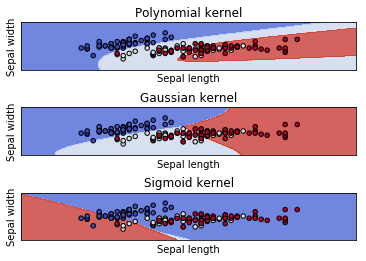

In [8]:
def test():
	X_train, X_test, y_train, y_test = import_iris()
	poly_model = polynomial_kernel(X_train, X_test, y_train, y_test)
	gauss_model = gaussian_kernel(X_train, X_test, y_train, y_test)
	sigmoid_model = sigmoid_kernel(X_train, X_test, y_train, y_test)

	from sklearn import datasets
	iris = datasets.load_iris()
	X = iris.data[:, :2]
	y = iris.target

	X0, X1 = X[:, 0], X[:, 1]
	xx, yy = make_mesh(X0, X1)

	models = [poly_model.fit(X,y),gauss_model.fit(X,y),sigmoid_model.fit(X,y)]
	titles = ['Polynomial kernel','Gaussian kernel','Sigmoid kernel']

	fig, sub = plt.subplots(3, 1)
	plt.subplots_adjust(wspace=0.5, hspace=0.8)

	for clf,title,ax in zip(models,titles,sub.flatten()):
		plot_contours(ax, clf, xx, yy,cmap=plt.cm.coolwarm, alpha=0.8)
		ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
		ax.set_xlim(xx.min(), xx.max())
		ax.set_ylim(yy.min(), yy.max())
		ax.set_xlabel('Sepal length')
		ax.set_ylabel('Sepal width')
		ax.set_xticks(())
		ax.set_yticks(())
		ax.set_title(title)

	plt.show()

test()